# Vehicle Quality and Recall Analysis

# Importing data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data =pd.read_csv("PYTHON RECALL DATASET.csv")
data.head(10)

,#,Manufacturer Name,Voluntary Recall Date,Model,Variant,Status,Total number of target Recall Vehicles,Manufactured From,Manufactured To,Description of Potential Defect
0,1,BMW India Pvt Ltd,15-Mar-22,"BMW X3, X4, 5 Series",CBU,NaN,195,05-11-2017,1/29/2020,On Board Diagnosis Software Update
1,2,BMW India Pvt Ltd,01-Aug-21,"BMW 1/3 Series, BMW X1/3/5/6/, M3",CMU,NaN,7589,5/24/2005,30/15/2015,The gas generator of the driver's airbag may m...
2,3,BMW India Pvt Ltd,22-Jul-21,"BMW X5, X6",CBU,NaN,1393,01-07-2007,01-07-2011,The plug connection from the wiring harness to...
3,4,BMW India Pvt Ltd,31-May-21,BMW 3 Series,CBU,NaN,1,03-07-2020,03-07-2020,"In 2019, BMW decided on a safety-relevant reca..."
4,5,BMW India Pvt Ltd,04-Feb-21,"BMW 7 Series, X7, X6",CKD/CBU,NaN,3,7/30/2020,10/15/2020,The hydraulic unit was produced incorrectly.
5,6,BMW India Pvt Ltd,23-Nov-20,"BMW 2 & 5 Series, X3 and Z",CBU,NaN,27,07-Apr-19,03-Nov-20,Possibly no PDC sound output when inserting R.
6,7,BMW India Pvt Ltd,10-Oct-20,"BMW X5, M5, M8",CBU,NaN,49,11-Jun-17,03-Dec-20,A malfunction in the diagnosis of the tank ven...
7,8,BMW India Pvt Ltd,17-Jul-20,BMW X6,CBU,NaN,1,12-May-20,12-May-20,The hexagon nuts (copper nuts) on the holder o...
8,9,BMW India Pvt Ltd,23-Jun-20,BMW 3 Series,CBU,NaN,1,17-Mar-99,17-Mar-99,"The driver's airbag is equipped with a ""NADI"" ..."
9,10,BMW India Pvt Ltd,19-Jun-20,BMW Z4,CBU,NaN,13,NaN,NaN,The broken rod leads to a significant impairme...


# Preprossing of data

In [17]:
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isna().sum())

Dataset Overview:
   #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                                 

# Convert relevant columns to datetime format

In [18]:
data['Voluntary Recall Date'] = pd.to_datetime(data['Voluntary Recall Date'], errors='coerce')
data['Manufactured From'] = pd.to_datetime(data['Manufactured From'], errors='coerce')
data['Manufactured To'] = pd.to_datetime(data['Manufactured To'], errors='coerce')

# Check date conversion results
print("\nAfter Date Conversion:")
print(data[['Voluntary Recall Date', 'Manufactured From', 'Manufactured To']].head())


After Date Conversion:
  Voluntary Recall Date Manufactured From Manufactured To
0            2022-03-15        2017-05-11      2020-01-29
1            2021-08-01               NaT             NaT
2            2021-07-22        2007-01-07             NaT
3            2021-05-31        2020-03-07             NaT
4            2021-02-04               NaT      2020-10-15


C:\Users\grdee\AppData\Local\Temp\ipykernel_23520\134103639.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Voluntary Recall Date'] = pd.to_datetime(data['Voluntary Recall Date'], errors='coerce')


# Fill missing values

In [19]:
data['Status'] = data['Status'].fillna('Unknown')
data['Variant'] = data['Variant'].fillna('Unknown')

print("\nFilled Missing Values for 'Status' and 'Variant' as 'Unknown'.")
data.head(5)


Filled Missing Values for 'Status' and 'Variant' as 'Unknown'.


,#,Manufacturer Name,Voluntary Recall Date,Model,Variant,Status,Total number of target Recall Vehicles,Manufactured From,Manufactured To,Description of Potential Defect
0,1,BMW India Pvt Ltd,2022-03-15,"BMW X3, X4, 5 Series",CBU,Unknown,195,2017-05-11,2020-01-29,On Board Diagnosis Software Update
1,2,BMW India Pvt Ltd,2021-08-01,"BMW 1/3 Series, BMW X1/3/5/6/, M3",CMU,Unknown,7589,NaT,NaT,The gas generator of the driver's airbag may m...
2,3,BMW India Pvt Ltd,2021-07-22,"BMW X5, X6",CBU,Unknown,1393,2007-01-07,NaT,The plug connection from the wiring harness to...
3,4,BMW India Pvt Ltd,2021-05-31,BMW 3 Series,CBU,Unknown,1,2020-03-07,NaT,"In 2019, BMW decided on a safety-relevant reca..."
4,5,BMW India Pvt Ltd,2021-02-04,"BMW 7 Series, X7, X6",CKD/CBU,Unknown,3,NaT,2020-10-15,The hydraulic unit was produced incorrectly.


# Nested if-elif-else logic

In [20]:
# Define a function with nested if-elif-else logic to classify recalls based on vehicle numbers
def classify_recall(total_vehicles):
    if total_vehicles > 5000:
        return "High"
    elif 1000 <= total_vehicles <= 5000:
        return "Medium"
    else:
        return "Low"

# Apply the function to classify recalls
data['Recall Classification'] = data['Total number of target Recall Vehicles'].apply(classify_recall)

# Display the modified dataset with the new column
data.head()


,#,Manufacturer Name,Voluntary Recall Date,Model,Variant,Status,Total number of target Recall Vehicles,Manufactured From,Manufactured To,Description of Potential Defect,Recall Classification
0,1,BMW India Pvt Ltd,2022-03-15,"BMW X3, X4, 5 Series",CBU,Unknown,195,2017-05-11,2020-01-29,On Board Diagnosis Software Update,Low
1,2,BMW India Pvt Ltd,2021-08-01,"BMW 1/3 Series, BMW X1/3/5/6/, M3",CMU,Unknown,7589,NaT,NaT,The gas generator of the driver's airbag may m...,High
2,3,BMW India Pvt Ltd,2021-07-22,"BMW X5, X6",CBU,Unknown,1393,2007-01-07,NaT,The plug connection from the wiring harness to...,Medium
3,4,BMW India Pvt Ltd,2021-05-31,BMW 3 Series,CBU,Unknown,1,2020-03-07,NaT,"In 2019, BMW decided on a safety-relevant reca...",Low
4,5,BMW India Pvt Ltd,2021-02-04,"BMW 7 Series, X7, X6",CKD/CBU,Unknown,3,NaT,2020-10-15,The hydraulic unit was produced incorrectly.,Low


# List

In [21]:
# Create a list of Manufacturer Names
manufacturers = list(data['Manufacturer Name'].dropna())
print(manufacturers[:5])  # Display the first 5 manufacturers


['BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd']


# Type conversion : list to a tuple

In [22]:
# Convert the list to a tuple
manufacturers_tuple = tuple(manufacturers)
print(manufacturers_tuple[:5])  # Display the first 5 tuples


('BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd', 'BMW India Pvt Ltd')


# Dictionary

In [23]:
# Create a dictionary
manufacturer_recall_dict = dict(zip(data['Manufacturer Name'], data['Total number of target Recall Vehicles']))
print({k: manufacturer_recall_dict[k] for k in list(manufacturer_recall_dict)[:5]})  # First 5 key-value pairs


{'BMW India Pvt Ltd': 2, 'Fiat India Automobiles Pvt Ltd': 1522, 'Ford India Pvt Ltd': 17655, 'General Motors India Pvt Ltd': 155000, 'H-D Motor Company India Pvt Ltd': 3698}


# Importing NumPy and Creating Arrays

In [24]:
import numpy as np
import pandas as pd

# Convert to NumPy array
data_array = data.to_numpy()

# Display the first few rows of the array
print("Dataset as a NumPy Array:\n", data_array[:5])


Dataset as a NumPy Array:
 [['1' 'BMW India Pvt Ltd' Timestamp('2022-03-15 00:00:00')
  'BMW X3, X4, 5 Series' 'CBU' 'Unknown' 195
  Timestamp('2017-05-11 00:00:00') Timestamp('2020-01-29 00:00:00')
  'On Board Diagnosis Software Update' 'Low']
 ['2' 'BMW India Pvt Ltd' Timestamp('2021-08-01 00:00:00')
  'BMW 1/3 Series, BMW X1/3/5/6/, M3' 'CMU' 'Unknown' 7589 NaT NaT
  "The gas generator of the driver's airbag may malfunction if it has been exposed to high humidity and high temperature fluctuations for many years."
  'High']
 ['3' 'BMW India Pvt Ltd' Timestamp('2021-07-22 00:00:00') 'BMW X5, X6'
  'CBU' 'Unknown' 1393 Timestamp('2007-01-07 00:00:00') NaT
  'The plug connection from the wiring harness to the blower controller may deteriorate over time.'
  'Medium']
 ['4' 'BMW India Pvt Ltd' Timestamp('2021-05-31 00:00:00') 'BMW 3 Series'
  'CBU' 'Unknown' 1 Timestamp('2020-03-07 00:00:00') NaT
  'In 2019, BMW decided on a safety-relevant recall for certain vehicles of the E46 (3 series

# Array Operations

In [25]:
import numpy as np
import pandas as pd

# Select numerical columns
numerical_data = data.select_dtypes(include=[np.number]).to_numpy()

# Check if there are numerical columns
if numerical_data.shape[1] < 2:
    print("\nWarning: The dataset has less than 2 numerical columns. Exiting operations.")
else:
    # Perform Array Operations
    col1 = numerical_data[:, 0]  # First numerical column
    col2 = numerical_data[:, 1]  # Second numerical column

    # Addition
    addition_result = col1 + col2
    print("\nAddition Result (Column 1 + Column 2):\n", addition_result[:5])

    # Subtraction
    subtraction_result = col1 - col2
    print("\nSubtraction Result (Column 1 - Column 2):\n", subtraction_result[:5])

    # Multiplication
    multiplication_result = col1 * col2
    print("\nMultiplication Result (Column 1 * Column 2):\n", multiplication_result[:5])

    # Division
    division_result = col1 / (col2 + 1e-9)  # Avoid division by zero
    print("\nDivision Result (Column 1 / Column 2):\n", division_result[:5])


# Indexing and Slicing

In [19]:
# Extract a specific row
row_0 = data_array[0, :]
print("\nFirst Row of the Dataset:\n", row_0)

# Extract a specific column
column_1 = data_array[:, 1]
print("\nSecond Column of the Dataset:\n", column_1[:5])

# Extract a subset of rows and columns (e.g., rows 0-4, columns 1-2)
subset = data_array[0:5, 1:3]
print("\nSubset of the Dataset (Rows 0-4, Columns 1-2):\n", subset)



First Row of the Dataset:
 ['1' 'BMW India Pvt Ltd' '15-Mar-22' 'BMW X3, X4, 5 Series' 'CBU' nan 195
 '05-11-2017' '1/29/2020' 'On Board Diagnosis Software Update']

Second Column of the Dataset:
 ['BMW India Pvt Ltd' 'BMW India Pvt Ltd' 'BMW India Pvt Ltd'
 'BMW India Pvt Ltd' 'BMW India Pvt Ltd']

Subset of the Dataset (Rows 0-4, Columns 1-2):
 [['BMW India Pvt Ltd' '15-Mar-22']
 ['BMW India Pvt Ltd' '01-Aug-21']
 ['BMW India Pvt Ltd' '22-Jul-21']
 ['BMW India Pvt Ltd' '31-May-21']
 ['BMW India Pvt Ltd' '04-Feb-21']]


# Arithmetic Operations

In [26]:
import numpy as np
import pandas as pd

# Inspect dataset
print("\nDataset Information:")
print(data.info())
print("\nFirst Few Rows of the Dataset:")
print(data.head())

# Select numerical columns
numerical_data = data.select_dtypes(include=[np.number])

if numerical_data.empty:
    print("No numerical columns found in the dataset.")
else:
    numerical_array = numerical_data.to_numpy()
    print("\nNumerical Data Array:\n", numerical_array[:5])

    # Perform operations if there are numerical columns
    col1 = numerical_array[:, 0]  # First numerical column
    if numerical_array.shape[1] > 1:  # Check for the second column
        col2 = numerical_array[:, 1]

        # Perform operations
        print("\nAddition Result (Column 1 + Column 2):\n", (col1 + col2)[:5])
        print("\nSubtraction Result (Column 1 - Column 2):\n", (col1 - col2)[:5])
        print("\nMultiplication Result (Column 1 * Column 2):\n", (col1 * col2)[:5])
        print("\nDivision Result (Column 1 / Column 2):\n", (col1 / (col2 + 1e-9))[:5])

    # Scalar operations
    print("\nAdding 10 to Column 1:\n", (col1 + 10)[:5])
    print("\nMultiplying Column 1 by 2:\n", (col1 * 2)[:5])



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   #                                       482 non-null    object        
 1   Manufacturer Name                       481 non-null    object        
 2   Voluntary Recall Date                   481 non-null    datetime64[ns]
 3   Model                                   481 non-null    object        
 4   Variant                                 482 non-null    object        
 5   Status                                  482 non-null    object        
 6   Total number of target Recall Vehicles  482 non-null    int64         
 7   Manufactured From                       67 non-null     datetime64[ns]
 8   Manufactured To                         86 non-null     datetime64[ns]
 9   Description of Potential Defect 

# Data Structures (Series and DataFrame)

In [27]:
# Inspect the column names
print("\nColumn Names in the Dataset:\n", data.columns)

# Check for the exact column name or strip spaces
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces

# Verify and extract the 'Manufacturer' column
if 'Manufacturer' in data.columns:
    series_example = data['Manufacturer']
    print("\nSeries Example:\n", series_example.head())
else:
    print("\nThe column 'Manufacturer' does not exist in the dataset.")



Column Names in the Dataset:
 Index(['#', 'Manufacturer Name', 'Voluntary Recall Date', 'Model', 'Variant',
       'Status', 'Total number of target Recall Vehicles', 'Manufactured From',
       'Manufactured To', 'Description of Potential Defect'],
      dtype='object')

The column 'Manufacturer' does not exist in the dataset.


# DataFrame Manipulation

In [28]:
# Add a new column
data['New_Column'] = "Example"
print("\nDataFrame with New Column:\n", data.head())


DataFrame with New Column:
    #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                      

In [29]:
# Drop the new column
data = data.drop('New_Column', axis=1)
print("\nDataFrame after Dropping Column:\n", data.head())



DataFrame after Dropping Column:
    #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                

In [30]:
# Rename columns
data = data.rename(columns={'Manufacturer': 'Brand'})
print("\nRenamed Columns:\n", data.head())



Renamed Columns:
    #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                                

# Concatenation and Merging

In [31]:
# Create a second DataFrame for concatenation
data_copy = data.copy()

# Concatenate along rows
concat_rows = pd.concat([data, data_copy], axis=0)
print("\nConcatenation Along Rows:\n", concat_rows.head())

# Concatenate along columns
concat_columns = pd.concat([data, data_copy], axis=1)
print("\nConcatenation Along Columns:\n", concat_columns.head())



Concatenation Along Rows:
    #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                       

In [5]:
import pandas as pd

# Example data for 'data' DataFrame
data = pd.DataFrame({
    'Manufacturer Name': ['BMW India Pvt Ltd', 'Ford India Pvt Ltd', 'Toyota India Pvt Ltd'],
    'Model': ['X1', 'EcoSport', 'Corolla'],
    'Recall Count': [10, 5, 8]
})

# Example data for 'data_merge' DataFrame
data_merge = pd.DataFrame({
    'Brand': ['BMW India Pvt Ltd', 'Ford India Pvt Ltd'],
    'Country': ['India', 'USA']
})

# Rename 'Manufacturer Name' to 'Brand' in 'data' for consistency
data = data.rename(columns={'Manufacturer Name': 'Brand'})

# Merge the two DataFrames on 'Brand' column
merged_data = pd.merge(data, data_merge, on='Brand', how='left')

# Display the merged data
print("\nMerged DataFrame:\n", merged_data)



Merged DataFrame:
                   Brand     Model  Recall Count Country
0     BMW India Pvt Ltd        X1            10   India
1    Ford India Pvt Ltd  EcoSport             5     USA
2  Toyota India Pvt Ltd   Corolla             8     NaN


# iloc with Your Dataset

In [5]:
import pandas as pd

# Assuming your data is loaded as 'data'
# First few rows
print("\nFirst 5 rows of the dataset:\n", data.iloc[:5])

# Selecting rows 5 to 10 and columns 2 to 4
print("\nRows 5 to 10 and Columns 2 to 4:\n", data.iloc[5:10, 2:5])

# Accessing the value at row 2, column 3
specific_value = data.iloc[2, 3]
print("\nValue at row 2, column 3:", specific_value)

# Selecting all rows for the 1st and 4th columns
subset_data = data.iloc[:, [1, 3]]
print("\nSubset of columns 1 and 4:\n", subset_data)

# Modifying a value using iloc (example)
data.iloc[0, 1] = 'Modified Value'
print("\nModified value at row 0, column 1:", data.iloc[0, 1])



First 5 rows of the dataset:
    #  Manufacturer Name Voluntary Recall Date  \
0  1  BMW India Pvt Ltd             15-Mar-22   
1  2  BMW India Pvt Ltd             01-Aug-21   
2  3  BMW India Pvt Ltd             22-Jul-21   
3  4  BMW India Pvt Ltd             31-May-21   
4  5  BMW India Pvt Ltd             04-Feb-21   

                               Model  Variant Status  \
0               BMW X3, X4, 5 Series      CBU    NaN   
1  BMW 1/3 Series, BMW X1/3/5/6/, M3      CMU    NaN   
2                         BMW X5, X6      CBU    NaN   
3                       BMW 3 Series      CBU    NaN   
4               BMW 7 Series, X7, X6  CKD/CBU    NaN   

   Total number of target Recall Vehicles Manufactured From Manufactured To  \
0                                     195        05-11-2017       1/29/2020   
1                                    7589         5/24/2005      30/15/2015   
2                                    1393        01-07-2007      01-07-2011   
3                    

# Update columns name

In [9]:
# Ensure columns are in datetime format
data['Manufactured From'] = pd.to_datetime(data['Manufactured From'], errors='coerce')
data['Manufactured To'] = pd.to_datetime(data['Manufactured To'], errors='coerce')
data['Voluntary Recall Date'] = pd.to_datetime(data['Voluntary Recall Date'], errors='coerce')
# Feature: Recall Duration (in Days)
data['Recall Duration (Days)'] = (data['Manufactured To'] - data['Manufactured From']).dt.days
# Feature: Recall Year
data['Recall Year'] = data['Voluntary Recall Date'].dt.year
# Filter rows where Recall Duration is not NaN
data_cleaned = data.dropna(subset=['Recall Duration (Days)'])
# Display the updated dataset with valid recall durations
print("Feature Engineering Completed!")
print(data_cleaned[['Manufacturer Name', 'Recall Duration (Days)', 'Recall Year']].head(5))

Feature Engineering Completed!
       Manufacturer Name  Recall Duration (Days)  Recall Year
0         Modified Value                   993.0       2022.0
26     BMW India Pvt Ltd                   165.0       2018.0
37    Ford India Pvt Ltd                  1757.0       2021.0
41    Ford India Pvt Ltd                   587.0       2019.0
61  Honda Cars India Ltd                   177.0       2020.0


# Time Series Analysis

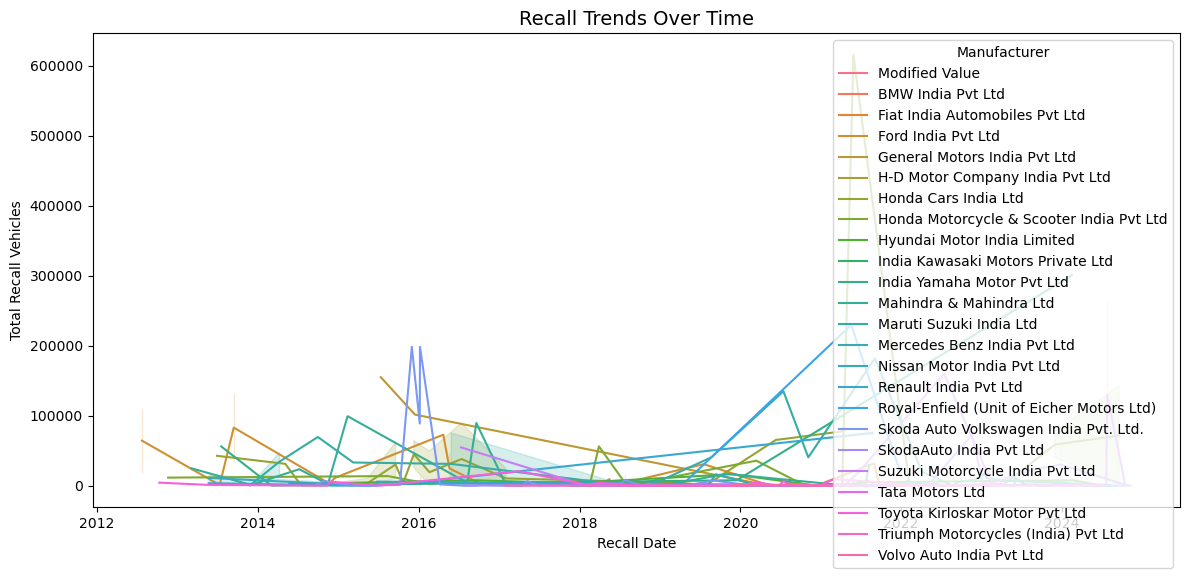

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Voluntary Recall Date', y='Total number of target Recall Vehicles', hue='Manufacturer Name')
plt.title('Recall Trends Over Time', fontsize=14)
plt.xlabel('Recall Date')
plt.ylabel('Total Recall Vehicles')
plt.legend(loc='upper right', title='Manufacturer')
plt.tight_layout()
plt.show()

# Plotting a histogram for Recall Duration

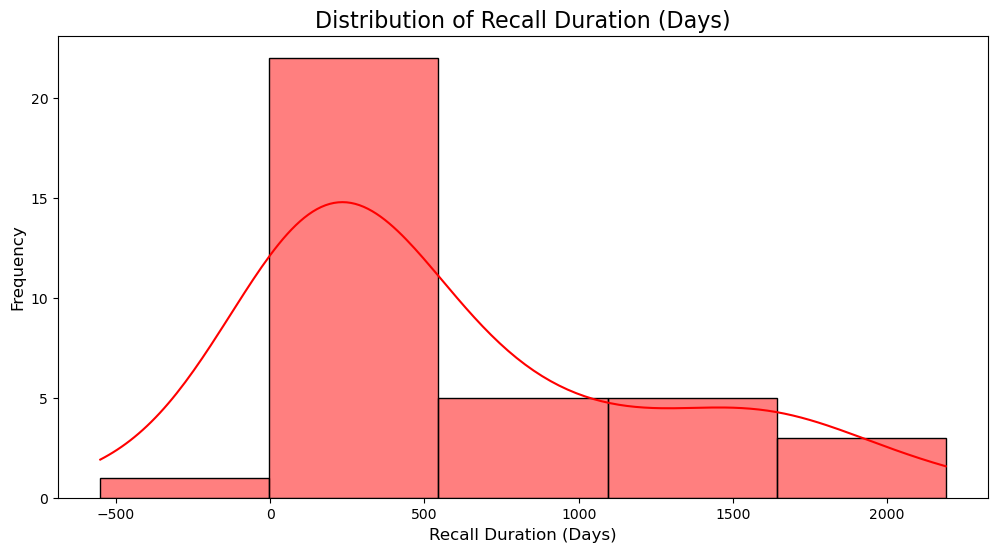

In [14]:
# Plotting a histogram for Recall Duration
plt.figure(figsize=(12, 6))
sns.histplot(data['Recall Duration (Days)'], kde=True, color='red', bins=5)

# Adding titles and labels
plt.title('Distribution of Recall Duration (Days)', fontsize=16)
plt.xlabel('Recall Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

# Count of recalls by manufacturer

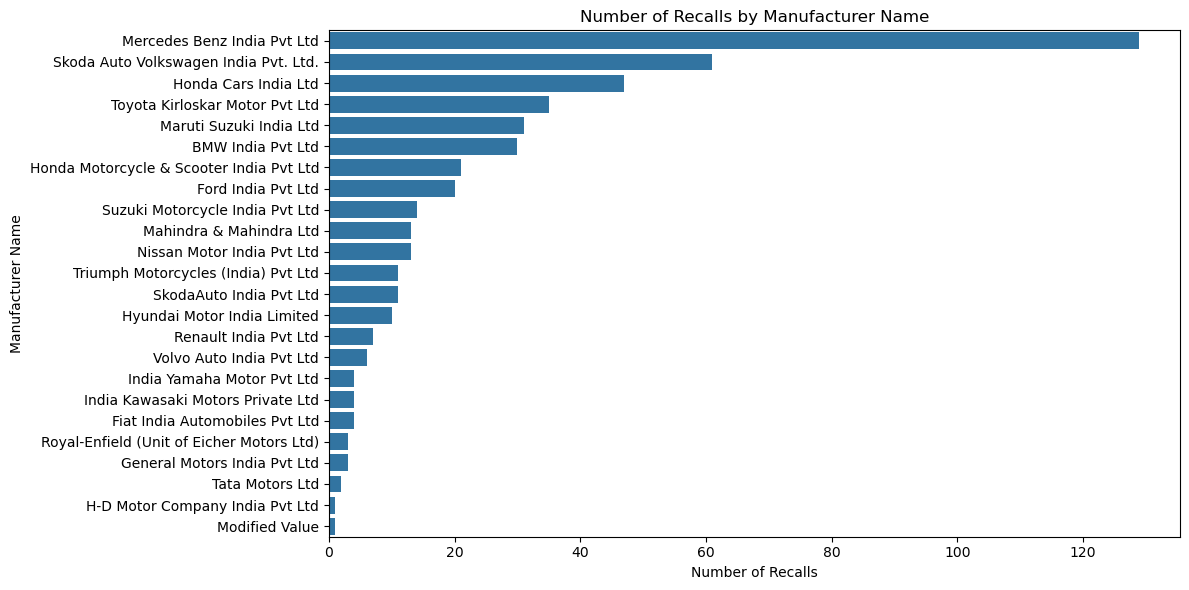

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count of recalls by manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Manufacturer Name', order=data['Manufacturer Name'].value_counts().index)
plt.title('Number of Recalls by Manufacturer Name')
plt.xlabel('Number of Recalls')
plt.ylabel('Manufacturer Name')
plt.tight_layout()
plt.show()


# Distribution of Manufacturer Name

C:\Users\grdee\AppData\Local\Temp\ipykernel_7808\1159365705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Manufacturer Name', palette='viridis', dodge=False)


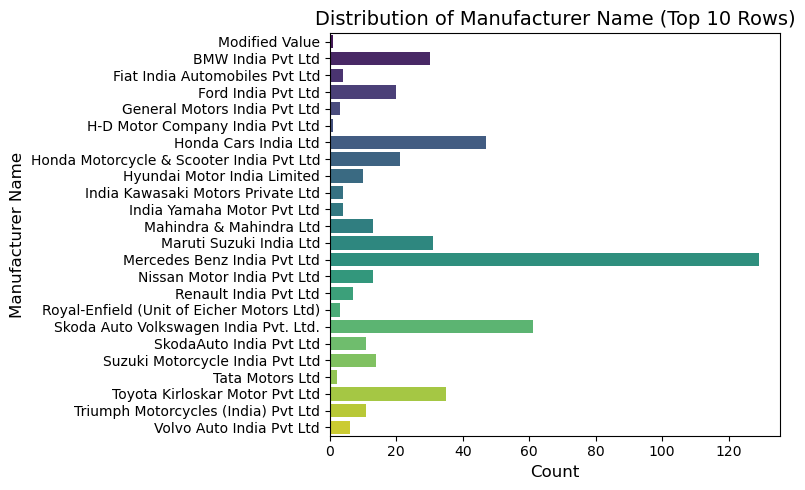

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Distribution of Manufacturer Name
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Manufacturer Name', palette='viridis', dodge=False)
plt.title('Distribution of Manufacturer Name (Top 10 Rows)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Manufacturer Name', fontsize=12)
plt.tight_layout()
plt.show()

# Bar Chart: Total Recall Vehicles per Manufacturer

C:\Users\grdee\AppData\Local\Temp\ipykernel_7808\4166454755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,
C:\Users\grdee\AppData\Local\Temp\ipykernel_7808\4166454755.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Manufacturer Name', loc='upper right')


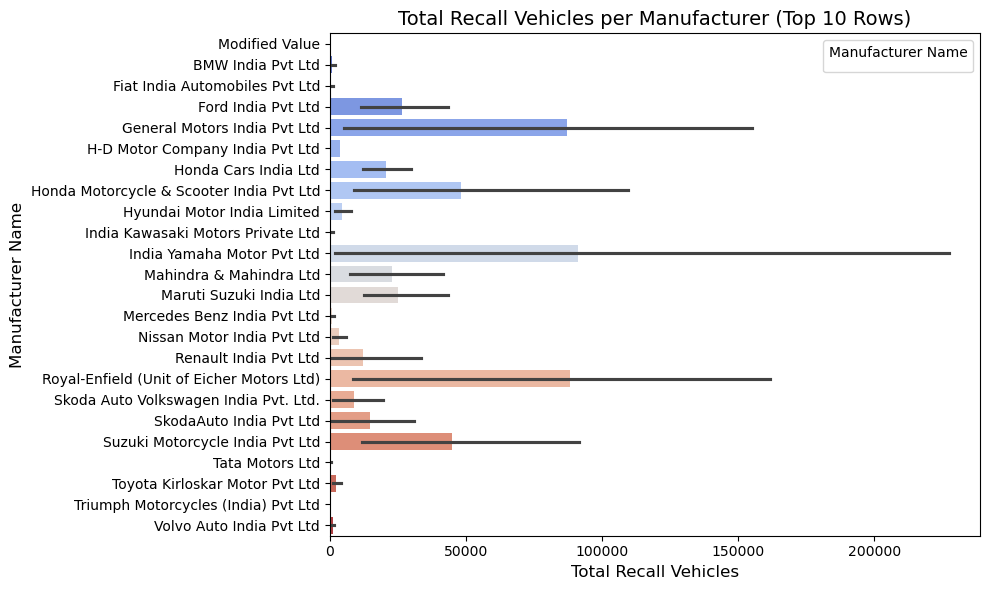

In [33]:
#2. Bar Chart: Total Recall Vehicles per Manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(data=data, 
            x='Total number of target Recall Vehicles', 
            y='Manufacturer Name', 
            dodge=False, 
            palette='coolwarm')
plt.title('Total Recall Vehicles per Manufacturer (Top 10 Rows)', fontsize=14)
plt.xlabel('Total Recall Vehicles', fontsize=12)
plt.ylabel('Manufacturer Name', fontsize=12)
plt.legend(title='Manufacturer Name', loc='upper right')
plt.tight_layout()
plt.show()

# Pie Chart: Status of Recalls

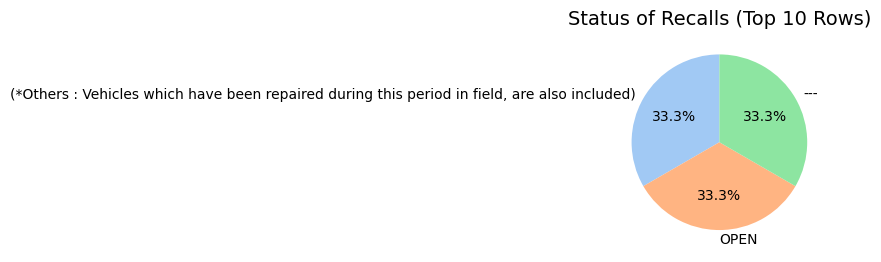

In [22]:
# Pie Chart: Status of Recalls
plt.figure(figsize=(8, 8))
data['Status'].value_counts().plot.pie(autopct='%1.1f%%', 
                                          startangle=90, 
                                          colors=sns.color_palette('pastel'))
plt.title('Status of Recalls (Top 10 Rows)', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Box Plot: Recall Vehicles by Manufacturer

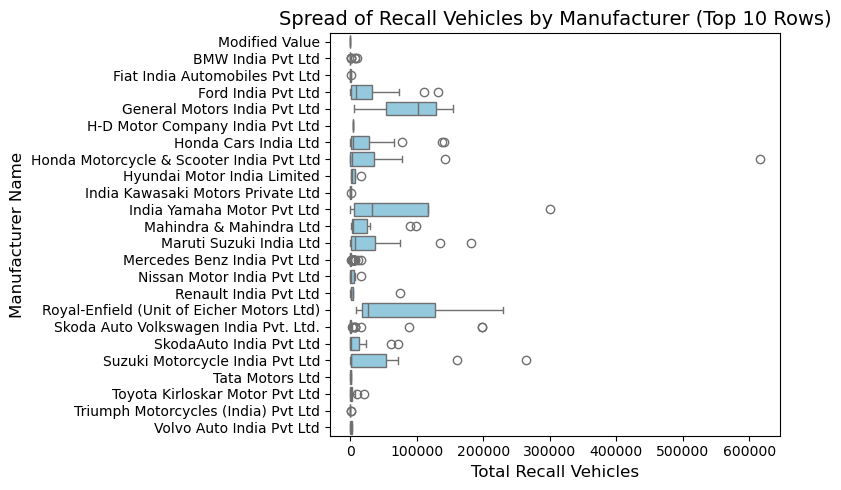

In [24]:
# Box Plot: Recall Vehicles by Manufacturer
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, 
            x='Total number of target Recall Vehicles', 
            y='Manufacturer Name', 
            color='skyblue')  # Use a single color instead of palette
plt.title('Spread of Recall Vehicles by Manufacturer (Top 10 Rows)', fontsize=14)
plt.xlabel('Total Recall Vehicles', fontsize=12)
plt.ylabel('Manufacturer Name', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot for Recall Duration by Manufacturer

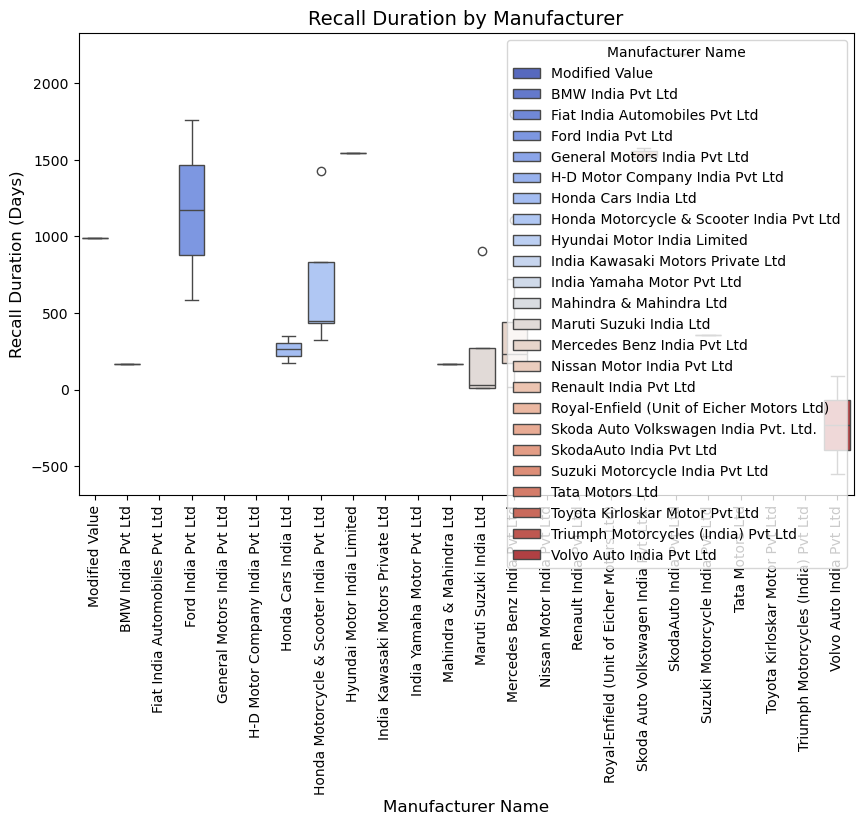

In [27]:
# Recall Duration vs Manufacturer
# Boxplot for Recall Duration by Manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Manufacturer Name', y='Recall Duration (Days)', palette='coolwarm',hue='Manufacturer Name')
plt.title('Recall Duration by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer Name', fontsize=12)
plt.ylabel('Recall Duration (Days)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()